*italicized text*# Graph Data Analytics

In [ ]:
#!conda install networkx --yes

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
G = nx.karate_club_graph()
print(nx.info(G))

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges


C:\Users\Guang\AppData\Local\Temp\ipykernel_4068\2580942427.py:5: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


### Calculate page rank by using simple degree centrality

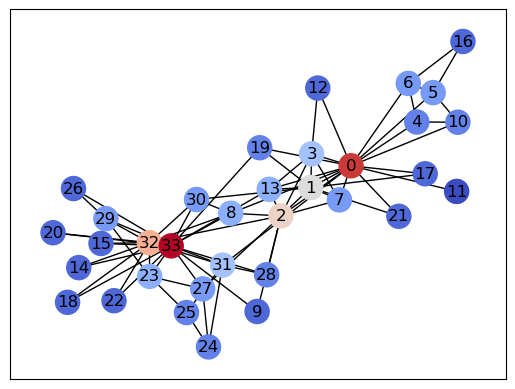

In [3]:
def simple_pagerank(G):
    p = np.array([G.degree(index) for node, index in enumerate(G.nodes())])
    return p

values = simple_pagerank(G)
nx.draw_networkx(G, cmap=plt.get_cmap('coolwarm'), node_color = values, with_labels=True)

### Calculate page rank by updating the centrality of each node with the iteration

(34,)


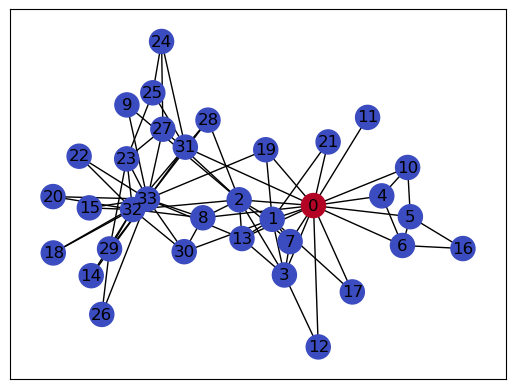

In [4]:
def pagerank_centrality(G, iter=100):
    p = np.array([1 for i in list(G.nodes())])
    print(p.shape)
    for k in range(iter):
        for i in G.nodes():
            for j in G.nodes():
                # update the centrality
                try:
                    p[i] += int(G.number_of_edges(i, j) * p[j] / G.degree[j])
                except:
                    pass
        
        norm = sum(p)
        p = p / norm        
    return p


values = pagerank_centrality(G)
nx.draw_networkx(G, cmap=plt.get_cmap('coolwarm'), node_color = values, with_labels=True)

In [6]:
G = nx.read_edgelist("gr0.California.edges.txt")
G.remove_nodes_from(list(nx.isolates(G)))
print(nx.info(G))
G1 = G.subgraph(list(G.nodes())[100:150])
print(nx.info(G1))

Graph with 6175 nodes and 15969 edges
Graph with 50 nodes and 42 edges


C:\Users\Guang\AppData\Local\Temp\ipykernel_4068\973125873.py:3: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))
C:\Users\Guang\AppData\Local\Temp\ipykernel_4068\973125873.py:5: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G1))


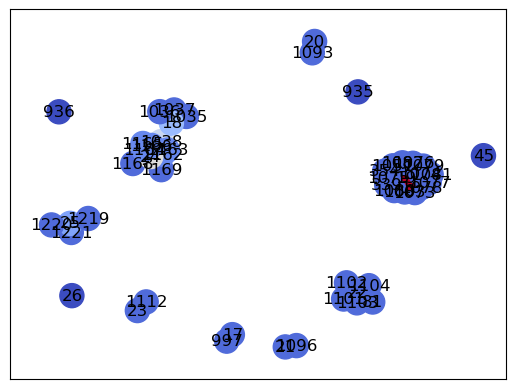

In [7]:
values = simple_pagerank(G1)
nx.draw_networkx(G1, cmap=plt.get_cmap('coolwarm'), node_color = values, with_labels=True)

(50,)


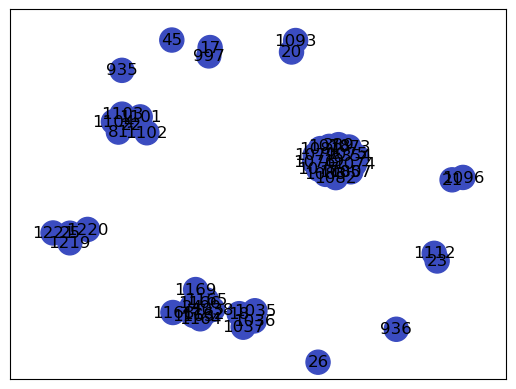

In [8]:
values = pagerank_centrality(G1)
nx.draw_networkx(G1, cmap=plt.get_cmap('coolwarm'), node_color = values, with_labels=True)